In [3]:
#MLE-01
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [4]:
#MLE-02
np.random.seed(20160512)

n0, mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0, n0)
df0 = DataFrame(data0, columns = ['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance0, n1)
df1 = DataFrame(data1, columns = ['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop = True)

In [10]:
train_set

,x1,x2,t
0,20.602839,18.292691,1
1,16.503919,14.685085,0
2,5.508661,17.426775,0
3,9.167047,9.178837,0
4,8.640423,9.561952,0
5,10.500988,17.002584,0
6,16.555281,22.129079,1
7,6.979059,8.180596,0
8,11.701339,0.996734,0
9,21.211252,18.772234,1


In [5]:
#MLE-04
train_x = train_set[['x1', 'x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

/Users/seijisuzuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/seijisuzuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#MLE-05
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)

In [8]:
#MLE-06
t = tf.placeholder(tf.float32, [None, 1])
loss =  -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [10]:
#MLE-07
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
#MLE-08
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
#MLE-09
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i%2000 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 2000, Loss: 3.281821, Accuracy: 0.942857
Step: 4000, Loss: 3.212984, Accuracy: 0.942857
Step: 6000, Loss: 3.172826, Accuracy: 0.942857
Step: 8000, Loss: 3.152785, Accuracy: 0.942857
Step: 10000, Loss: 3.145661, Accuracy: 0.942857
Step: 12000, Loss: 3.144582, Accuracy: 0.942857
Step: 14000, Loss: 3.144566, Accuracy: 0.942857
Step: 16000, Loss: 3.144566, Accuracy: 0.942857
Step: 18000, Loss: 3.144564, Accuracy: 0.942857
Step: 20000, Loss: 3.144567, Accuracy: 0.942857


In [21]:
#MLE-10
w0_val, w_val = sess.run([w0, w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print(w0_val, w1_val, w2_val)

-23.2991 0.8147396 0.74712914


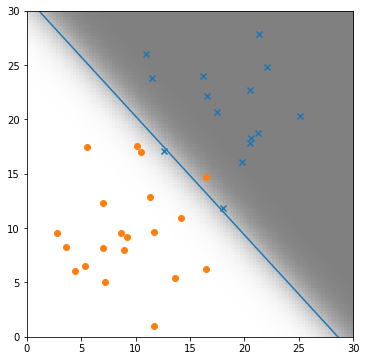

In [27]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize = (6, 6))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0, 30, 10)
liney = - (w1_val*linex/w2_val + w0_val/w2_val)
subplot.plot(linex, liney)

field = [[(1/ (1 + np.exp(-(w0_val + w1_val*x1 + w2_val*x2))))
          for x1 in np.linspace(0, 30, 100)]
         for x2 in np.linspace(0, 30, 100)]
subplot.imshow(field, origin = 'Lower', extent = (0, 30, 0, 30), cmap = plt.cm.gray_r, alpha =0.5)
